# Aims

To practice preprocessing a text dataset using feature extraction from sklearn. The dataset is spam.csv and consists of actual strings corresponding to text messages marked as either spam or not spam (or ham).

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [3]:
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

Remove unnecessary columns. We are only interested in the first two, where the first column is the label and the second column contains the string for the text message.

In [4]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [5]:
data.columns = ['labels','data']
data['labels'] = data['labels'].map({'ham':0,'spam':1})

In [6]:
X = data['data']
Y = data['labels']

In [7]:
Xtrain = X[:-100]
Ytrain = Y[:-100]
Xtest = X[-100:]
Ytest = Y[-100:]

Instantiate a vectorizer using the TfidfVectorizer from sklearn. TF-IDF is term frequency - inverse document frequency, which uses word frequencies in each message weighted inversely proportionally to their frequency throughout the entire dataset.

This ensures that words duplicated heavily across the whole dataset (such as 'the', 'and' etc.) have less significance to the model than more specific words (such as, in this case, 'free', 'claim', 'prize' etc.).

We then fit the model using the training data and transform both datasets. The fit_transform function does both of these.

In [8]:
vectorizer = TfidfVectorizer()

In [9]:
Xtrain = vectorizer.fit_transform(Xtrain)
Xtest = vectorizer.transform(Xtest)

Instantiate the model. Now we can use the transformed dataframe as the data for he model.

This model could be any classifier, Naive-Bayes has good performance and on this dataset performs with a success rate of approximately 97%.

In [ ]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)

In [11]:
model.score(Xtest,Ytest)

0.97

To visualise the data in both categories, we can create a wordcloud.

In [47]:
def visualize(label):
    words = ''
    for word in data.groupby(data['labels']).get_group(label)['data']:
        words += (word + '')
    wordcloud = WordCloud(width=600, height=400).generate(words)
    plt.imshow(wordcloud)
    if label == 1:
        plt.title('Wordcloud for spam')
    else:
        plt.title('Wordcloud for ham')
    plt.axis('off')
    plt.show()




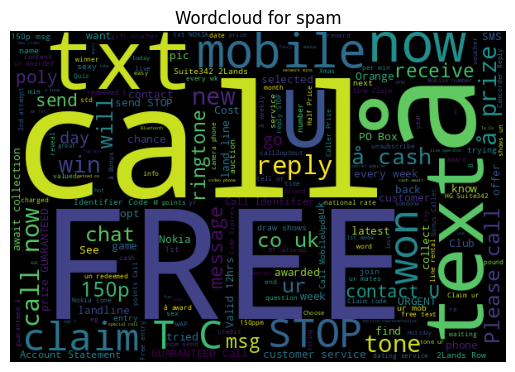

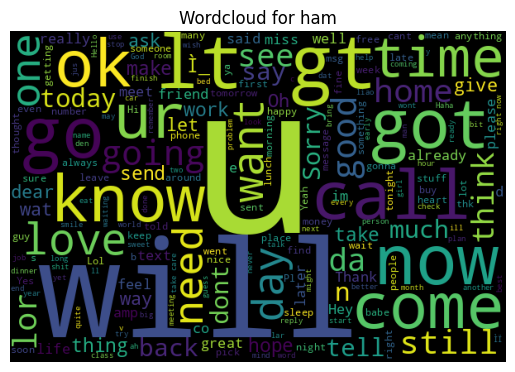

In [48]:
visualize(1)
visualize(0)